# Linear Regression in Python
https://python.quantecon.org/ols.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

[AJR01] wish to determine whether or not differences in institutions can help to explain observed economic outcomes.

How do we measure institutional differences and economic outcomes?

In this paper,

economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates.
institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the Political Risk Services Group.
These variables and other data used in the paper are available for download on Daron Acemoglu’s webpage.

In [2]:
df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


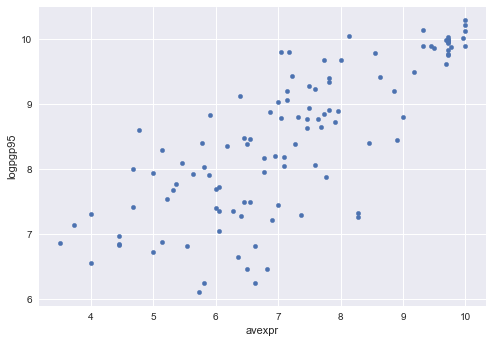

In [3]:
plt.style.use('seaborn')
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.

${logpgp95}_i = \beta_0 + \beta_1 {avexpr}_i + u_i$

where:

- β0 is the intercept of the linear trend line on the y-axis
- β1 is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
- ui is a random error term (deviations of observations from the linear trend due to factors not included in the model)


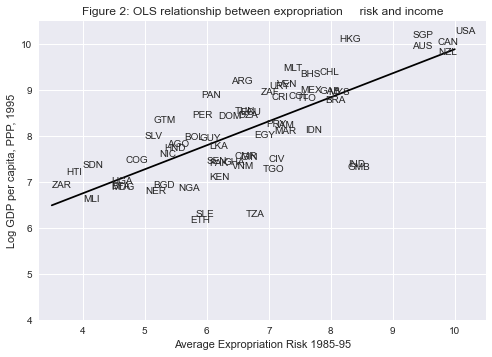

In [4]:
# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([3.3,10.5])
ax.set_ylim([4,10.5])
ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title('Figure 2: OLS relationship between expropriation \
    risk and income')
plt.show()

In [6]:
vars = ['avexpr', 'logpgp95', 'shortnam']
df = df1[vars]
df.tail()

,avexpr,logpgp95,shortnam
158,6.318182,NaN,YUG
159,6.863636,8.885994,ZAF
160,3.500000,6.866933,ZAR
161,6.636364,6.813445,ZMB
162,6.000000,7.696213,ZWE


In [8]:
from patsy import dmatrices
y, X = dmatrices('logpgp95 ~ avexpr', data=df, return_type='dataframe')

In [9]:
reg1 = sm.OLS(y, X)
results = reg1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           4.16e-24
Time:                        16:31:36   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.301     15.391      0.000       4.030       5.222
avexpr         0.5319      0.041     13.093      0.000       0.451       0.612
==============================================================================
Omnibus:                        9.251   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.170
Skew:                          -0.680   Prob(JB):                       0.0102
Kurtosis:                       3.362   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""